In [1]:
import os
import time
import torch
import argparse
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from collections import defaultdict
import torch.multiprocessing as mp
import torch.utils.data
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
from sklearn import preprocessing


slides_3 = np.load('../data/force_torque_sensor/Dataset/3_sides/Data/data.npy')

dataset = slides_3[:,0:10]

device = torch.device('cuda:0')
print(type(dataset))

<class 'numpy.ndarray'>


In [2]:
def feature_normalize(data):
    mu = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mu)/std

def un_normalize(normalized_data, input_data):
    mu = np.mean(input_data,axis=0)
    std = np.std(input_data,axis=0)
    return normalized_data*std+mu

In [3]:
# Create training and test dataloaders

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 16


# dataset = feature_normalize(dataset)
dataset = preprocessing.minmax_scale(dataset, feature_range=(0,1))


test_loader = DataLoader(dataset=dataset, batch_size=batch_size)


Loss function
--------------------



In [10]:
seed = 0

# vae = torch.load('vae_ft_inary_cross_entropy.pkl')
# vae = torch.load('vae_june7_59epoch_1024batch_size.pkl').cuda()
vae = torch.load('vae_10signals.pkl').to(device)



recon_signals=[]
latent_space=[]

import torch.utils.data

vae=vae.to(device)

for iteration, test in enumerate(test_loader):
    test = test.to(device).float()
    test_recon_x, test_mean, test_log_var, test_z = vae(test)
    test_recon_x = test_recon_x.view(batch_size, len(test_recon_x[0]))
    test_recon_x=test_recon_x.cpu().detach().numpy()
    latent_space=test_z.cpu().detach().numpy()

    recon_signals.extend(test_recon_x)
#     latent_space.extend(latent_space)
    
    if iteration ==10000:
        break
    
recon_signals = np.array(recon_signals)
latent_space = np.array(latent_space)


In [11]:
recon_signals = np.array(recon_signals)
print(len(test_recon_x[0]))
print(test_recon_x[0])

print(type(recon_signals[0]))
print(recon_signals[0])

print(len(recon_signals))
print(recon_signals)

print(recon_signals[:,0])

10
[0.5036622  0.49022308 0.4725093  0.5020228  0.5468402  0.2859041
 0.38481307 0.80032337 0.5866941  0.61829525]
<class 'numpy.ndarray'>
[0.50386554 0.4885016  0.47276106 0.5015418  0.5490459  0.28696403
 0.38447285 0.8003748  0.58596915 0.6178153 ]
160016
[[0.50386554 0.4885016  0.47276106 ... 0.8003748  0.58596915 0.6178153 ]
 [0.5036072  0.49576387 0.47498503 ... 0.7997934  0.5878902  0.62114465]
 [0.50340736 0.49246868 0.47390065 ... 0.79977894 0.586595   0.61842495]
 ...
 [0.5041721  0.49010846 0.47253066 ... 0.80102265 0.5873821  0.6186511 ]
 [0.50278205 0.49243844 0.47488964 ... 0.8027686  0.5907134  0.6174182 ]
 [0.50366986 0.4917363  0.47521785 ... 0.80704856 0.5929665  0.61711144]]
[0.50386554 0.5036072  0.50340736 ... 0.5041721  0.50278205 0.50366986]


In [12]:
for i in range(len(recon_signals[0])):
    recon_signals[:,i]=preprocessing.minmax_scale(
        recon_signals[:,i], feature_range=(np.min(slides_3[:,i]),np.max(slides_3[:,i])))
    
generate_signals = recon_signals

In [13]:
print(generate_signals)
    

[[ 2.2338629e-03 -1.4730804e-03  3.5319943e-05 ... -8.6454010e-01
  -8.0961132e-01 -6.9162130e-02]
 [ 2.1696389e-03 -5.4829568e-04  5.0673494e-05 ... -8.7137032e-01
  -7.7340031e-01 -6.0085773e-02]
 [ 2.1199733e-03 -9.6791238e-04  4.3187058e-05 ... -8.7154102e-01
  -7.9781437e-01 -6.7500114e-02]
 ...
 [ 2.3100525e-03 -1.2684613e-03  3.3729244e-05 ... -8.5692883e-01
  -7.8297806e-01 -6.6883683e-02]
 [ 1.9645318e-03 -9.7176433e-04  5.0014816e-05 ... -8.3641624e-01
  -7.2018528e-01 -7.0244670e-02]
 [ 2.1852255e-03 -1.0611713e-03  5.2280724e-05 ... -7.8613186e-01
  -6.7771626e-01 -7.1081042e-02]]


160016


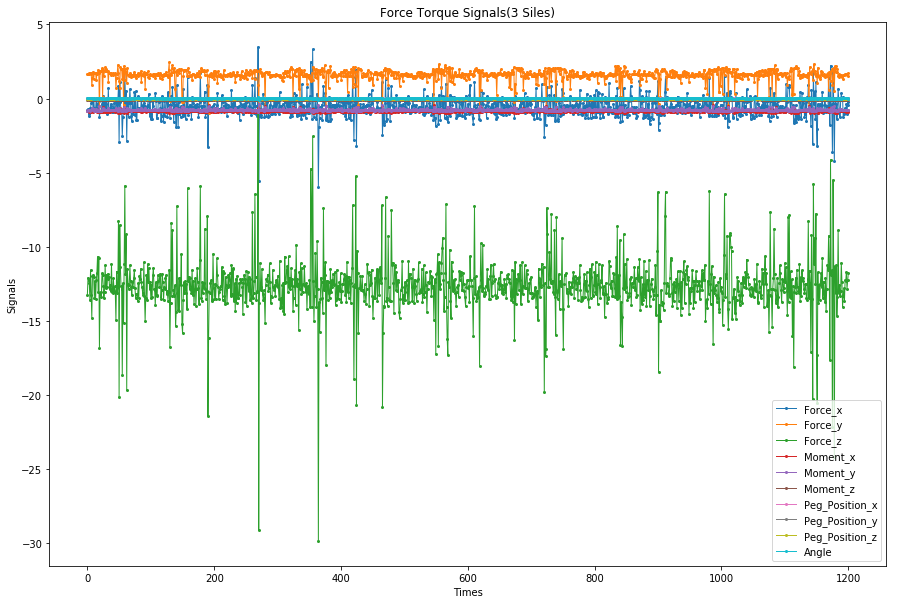

In [14]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

cmap=plt.cm.get_cmap(plt.cm.viridis,143)


# plt.rcParams['font.size'] = 11.
# plt.rcParams['font.family'] = 'Comic Sans MS'
# plt.rcParams['axes.labelsize'] = 15.
# plt.rcParams['xtick.labelsize'] = 10.
# plt.rcParams['ytick.labelsize'] = 10.

plt.figure(figsize=(15,10))



sides = generate_signals
print(len(sides))

slip = 1200

# Peg_Position_x = sides[:,0]
Peg_Position_x = sides[:,0][:slip]
# Peg_Position_x = sides[:,0][0:10:slip]

# Peg_Position_y = sides[:,1]
Peg_Position_y = sides[:,1][:slip]
# Peg_Position_y = sides[:,1][0:10:slip]

# Peg_Position_z = sides[:,2]
Peg_Position_z = sides[:,2][:slip]
# Peg_Position_z = sides[:,2][0:10:slip]

# Angle = sides[:,3]
Angle = sides[:,3][:slip]
# Angle = sides[:,3][0:10:slip]

# Force_x = sides[:,4]
Force_x = sides[:,4][:slip]
# Force_x = sides[:,4][0:10:slip]

# Force_y = sides[:,5]
Force_y = sides[:,5][:slip]
# Force_y = sides[:,5][0:10:slip]

# Force_z = sides[:,6]
Force_z = sides[:,6][:slip]
# Force_z = sides[:,6][0:10:slip]

# Moment_x = sides[:,7]
Moment_x = sides[:,7][:slip]
# Moment_x = sides[:,7][0:10:slip]

# Moment_y = sides[:,8]
Moment_y = sides[:,8][:slip]
# Moment_y = sides[:,8][0:10:slip]

# Moment_z = sides[:,9]
Moment_z = sides[:,9][:slip]
# Moment_z = sides[:,9][0:10:slip]

x = np.linspace(0,len(Moment_z),len(Moment_z))

plt.plot(x, Force_x, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_x')
plt.plot(x, Force_y, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_y')
plt.plot(x, Force_z, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_z')

plt.plot(x, Moment_x, marker='o', linestyle='-', markersize=2, linewidth=1, label='Moment_x')
plt.plot(x, Moment_y, marker='o', linestyle='-', markersize=2, linewidth=1, label='Moment_y')
plt.plot(x, Moment_z, marker='o', linestyle='-', markersize=2, linewidth=1, label='Moment_z')

plt.plot(x, Peg_Position_x, marker='o', linestyle='-', markersize=2, linewidth=1, label='Peg_Position_x')
plt.plot(x, Peg_Position_y, marker='o', linestyle='-', markersize=2, linewidth=1, label='Peg_Position_y')
plt.plot(x, Peg_Position_z, marker='o', linestyle='-', markersize=2, linewidth=1, label='Peg_Position_z')

plt.plot(x, Angle, marker='o', linestyle='-', markersize=2, linewidth=1, label='Angle')
# plt.plot(x, Counter, marker='o', linestyle='-', markersize=2, linewidth=1, label='Counter')


plt.xlabel('Times')
plt.ylabel('Signals')
plt.title('Force Torque Signals(3 Siles)')
plt.legend(loc='lower right')
plt.show()